In [1]:
import pickle as pkl
import os
from model import Model as ImitationTrainerModel

In [2]:
from GCSproxy import GCSproxy

In [3]:
local_expert_data_filename = "../../expert_data/RoboschoolHumanoid-v1.pkl"

In [4]:
gcs_expert_data_filename = "data/RoboschoolHumanoid-v1.pkl"

In [5]:
# convert to pandas -> numpy array

"""
expert_rollouts = pkl.load(open(expert_data_filename,"rb"))
import pandas as pd
X = pd.DataFrame(expert_rollouts['observations']).reset_index(drop=True).values
Y = pd.DataFrame(expert_rollouts['actions']).reset_index(drop=True).values
"""

'\nexpert_rollouts = pkl.load(open(expert_data_filename,"rb"))\nimport pandas as pd\nX = pd.DataFrame(expert_rollouts[\'observations\']).reset_index(drop=True).values\nY = pd.DataFrame(expert_rollouts[\'actions\']).reset_index(drop=True).values\n'

In [6]:
def load_data(expert_data_filename, mode):
    """
    returns numpy arrays X, Y
    X.shape = (, 44)
    Y.shape = (, 17)
    """
    if mode!="dev-local":
        proxy = GCSproxy(mode) 
        pkl_filename = proxy.gcs_load(expert_data_filename)
    else:
        pkl_filename = expert_data_filename

    expert_rollouts = pkl.load(open(pkl_filename,"rb"))  
    X = expert_rollouts['observations']
    Y = expert_rollouts['actions']
    assert len(X) == len(Y)
    return X, Y

In [28]:
def upload_model(source_model_dir, destination_model_dir, mode):
    """
    upload the whole model.ckpt. package (4 files)
    mode can be dev-cloud or prod-cloud, changes permission of GCSproxy
    """
    proxy = GCSproxy(mode) 
    files = os.listdir(source_model_dir)
    for file in files:
        proxy.gcs_write(
            os.path.join(source_model_dir, file),
            os.path.join(destination_model_dir, file)
        )

In [9]:
X, Y = load_data(gcs_expert_data_filename, mode="dev-cloud")

[GCSproxy.gcs_load] interacting with Google Cloud Storage to retrieve data: data/RoboschoolHumanoid-v1.pkl


In [10]:
model = ImitationTrainerModel()

In [21]:
save_folder="/tmp/imitation-learning-notebook/"

In [22]:
train_mse = model.train(X, Y, save_folder = save_folder)

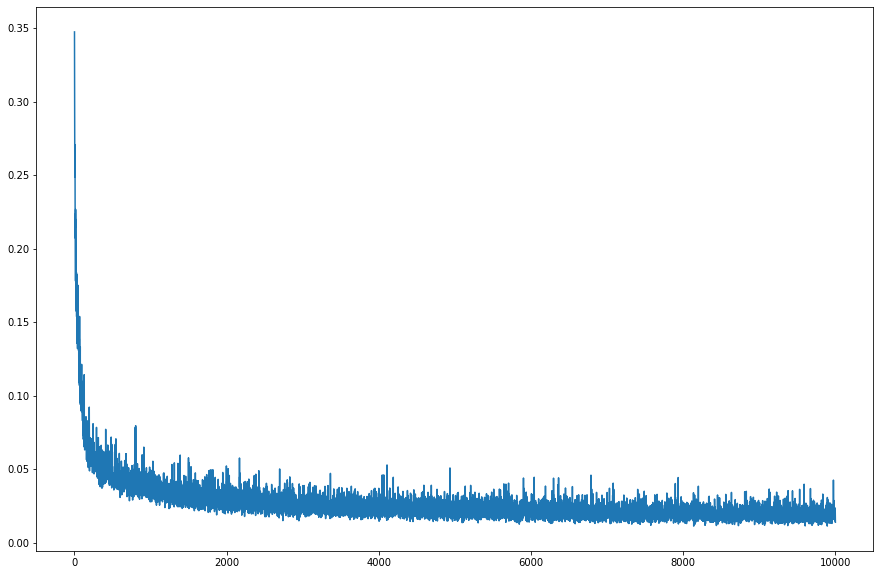

In [23]:
model.visualize_train_mse(train_mse)

In [24]:
y = model.predict(X, save_folder=save_folder)

INFO:tensorflow:Restoring parameters from /tmp/imitation-learning-notebook/model.ckpt


INFO:tensorflow:Restoring parameters from /tmp/imitation-learning-notebook/model.ckpt


In [17]:
model.evaluate_predictions(y, Y)

0.33379730898513604

In [29]:
upload_model(save_folder,"output/imitation-learning/00000/",mode="dev-cloud")

[GCSproxy.gcs_load] interacting with Google Cloud Storage to upload data: /tmp/imitation-learning-notebook/checkpoint
[GCSproxy.gcs_load] interacting with Google Cloud Storage to upload data: /tmp/imitation-learning-notebook/model.ckpt.data-00000-of-00001
[GCSproxy.gcs_load] interacting with Google Cloud Storage to upload data: /tmp/imitation-learning-notebook/model.ckpt.index
[GCSproxy.gcs_load] interacting with Google Cloud Storage to upload data: /tmp/imitation-learning-notebook/model.ckpt.meta
